# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | mata-utu
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | alta
Processing Record 9 of Set 1 | murudeshwara
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kiomboi
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | chivilcoy
Processing Record 16 of Set 1 | lazaro cardenas
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | harran
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | joshimath
Processing Record 21 of Set 1 | hamada
Processing Recor

Processing Record 39 of Set 4 | stanley
Processing Record 40 of Set 4 | shubarshi
Processing Record 41 of Set 4 | alexandria
Processing Record 42 of Set 4 | freeport
Processing Record 43 of Set 4 | ciudad guayana
Processing Record 44 of Set 4 | trincomalee
Processing Record 45 of Set 4 | chernyshevskiy
Processing Record 46 of Set 4 | villa canas
Processing Record 47 of Set 4 | reggane
Processing Record 48 of Set 4 | pandan
Processing Record 49 of Set 4 | invercargill
Processing Record 0 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 5 | santa maria da vitoria
Processing Record 2 of Set 5 | saipan
Processing Record 3 of Set 5 | namtsy
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | anzio
Processing Record 7 of Set 5 | ouellah
City not found. Skipping...
Processing Record 8 of Set 5 | vilyuchinsk
Processing Record 9 of Set 5 | rio verde de mato grosso
Processing Record 10 of Set 5 | anori
Processing Re

Processing Record 34 of Set 8 | isetskoye
Processing Record 35 of Set 8 | sarh
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | nereta
City not found. Skipping...
Processing Record 38 of Set 8 | jaru
Processing Record 39 of Set 8 | saint-philippe
Processing Record 40 of Set 8 | manokwari
Processing Record 41 of Set 8 | sungailiat
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | anabar
City not found. Skipping...
Processing Record 45 of Set 8 | gunjur
Processing Record 46 of Set 8 | prabumulih
Processing Record 47 of Set 8 | kuanda
Processing Record 48 of Set 8 | villa ojo de agua
Processing Record 49 of Set 8 | la mira
Processing Record 0 of Set 9 | north bend
Processing Record 1 of Set 9 | chonchi
Processing Record 2 of Set 9 | juan griego
Processing Record 3 of Set 9 | lompoc
Processing Record 4 of Set 9 | vorkuta
Processing Record 5 of Set 9 | honiara
Processing Record 6 of Set 9 | kushiro
Processin

Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | miquelon
Processing Record 25 of Set 12 | forster
Processing Record 26 of Set 12 | akdepe
Processing Record 27 of Set 12 | ban houakhoua
Processing Record 28 of Set 12 | mukalla
Processing Record 29 of Set 12 | bardai
Processing Record 30 of Set 12 | anna regina
Processing Record 31 of Set 12 | mili
Processing Record 32 of Set 12 | sao jose da coroa grande
Processing Record 33 of Set 12 | rouissat
Processing Record 34 of Set 12 | mazabuka
Processing Record 35 of Set 12 | tuburan
Processing Record 36 of Set 12 | flying fish cove
Processing Record 37 of Set 12 | bada
Processing Record 38 of Set 12 | colac
Processing Record 39 of Set 12 | salekhard
Processing Record 40 of Set 12 | kiunga
Processing Record 41 of Set 12 | saskatoon
Processing Record 42 of Set 12 | carrizo springs
Processing Record 43 of Set 12 | chegdomyn
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,18.81,55,40,4.12,AR,1707076947
1,grytviken,-54.2811,-36.5092,3.54,69,15,6.37,GS,1707076951
2,port-aux-francais,-49.3500,70.2167,5.00,72,8,9.12,TF,1707076952
3,ilulissat,69.2167,-51.1000,-20.99,54,8,3.09,GL,1707076954
4,mata-utu,-13.2816,-176.1745,28.62,75,100,4.66,WF,1707076955


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,18.81,55,40,4.12,AR,1707076947
1,grytviken,-54.2811,-36.5092,3.54,69,15,6.37,GS,1707076951
2,port-aux-francais,-49.3500,70.2167,5.00,72,8,9.12,TF,1707076952
3,ilulissat,69.2167,-51.1000,-20.99,54,8,3.09,GL,1707076954
4,mata-utu,-13.2816,-176.1745,28.62,75,100,4.66,WF,1707076955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

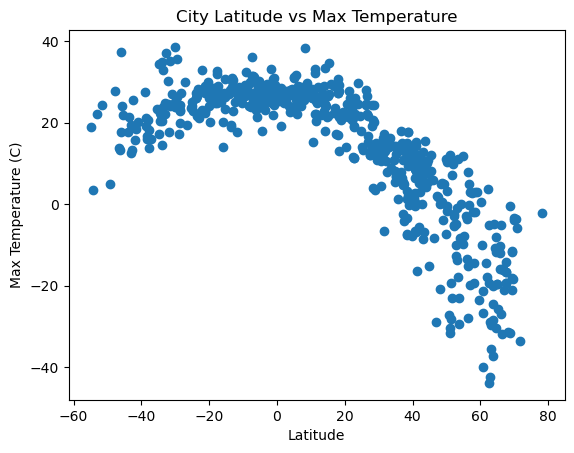

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

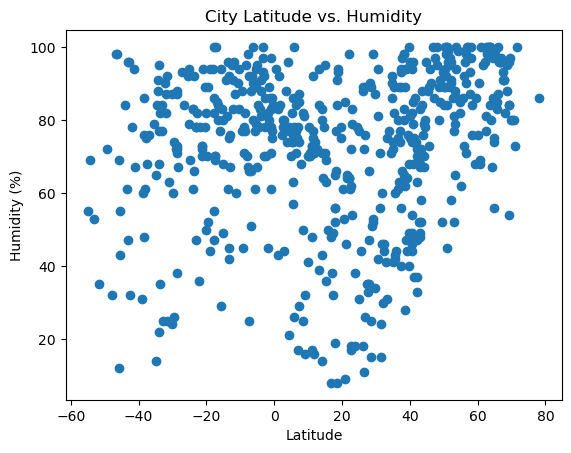

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

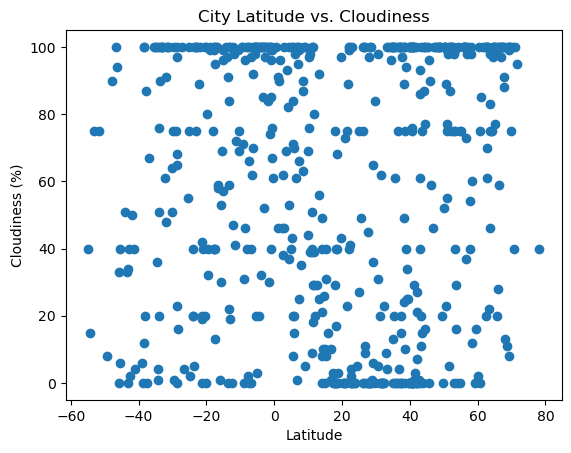

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

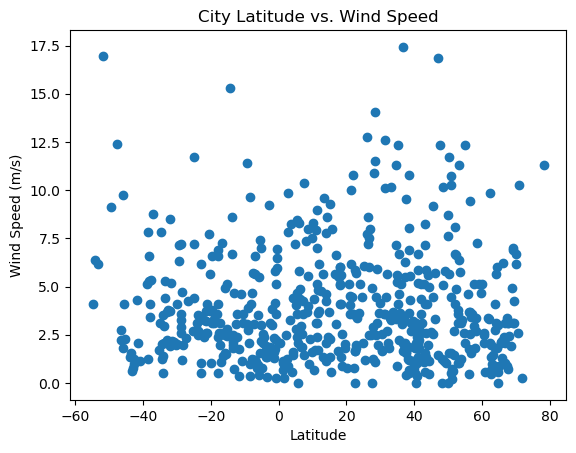

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_Lat=city_data_df['Lat']
y_Temp=city_data_df['Max Temp']
y_Hum=city_data_df['Humidity']
y_Cloud=city_data_df['Cloudiness']
y_Wind=city_data_df['Wind Speed']

(T_slope,T_intercept,T_rvalue,T_pvalue,T_stderr)=linregress(x_Lat,y_Temp)
(H_slope,H_intercept,H_rvalue,H_pvalue,H_stderr)=linregress(x_Lat,y_Hum)
(C_slope,C_intercept,C_rvalue,C_pvalue,C_stderr)=linregress(x_Lat,y_Cloud)
(W_slope,W_intercept,W_rvalue,W_pvalue,W_stderr)=linregress(x_Lat,y_Wind)

Temp_regress=x_Lat*T_slope+T_intercept
Hum_regress=x_Lat*H_slope+H_intercept
Cloud_regress=x_Lat*C_slope+C_intercept
Wind_regress=x_Lat*W_slope+W_intercept



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ilulissat,69.2167,-51.1000,-20.99,54,8,3.09,GL,1707076954
6,cockburn town,21.4612,-71.1419,25.98,65,75,6.17,TC,1707076946
7,alta,69.9689,23.2717,-3.41,80,75,6.17,NO,1707076957
8,murudeshwara,14.0943,74.4845,24.26,80,0,2.08,IN,1707076958
9,yellowknife,62.4560,-114.3525,-19.21,77,20,2.06,CA,1707076869


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,18.81,55,40,4.12,AR,1707076947
1,grytviken,-54.2811,-36.5092,3.54,69,15,6.37,GS,1707076951
2,port-aux-francais,-49.3500,70.2167,5.00,72,8,9.12,TF,1707076952
4,mata-utu,-13.2816,-176.1745,28.62,75,100,4.66,WF,1707076955
5,edinburgh of the seven seas,-37.0676,-12.3116,15.87,76,67,8.78,SH,1707076956


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7462108403756217


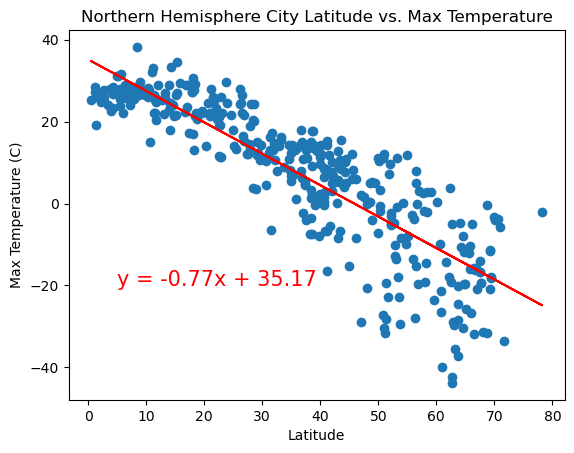

In [24]:
# Linear regression on Northern Hemisphere
#copied from regression above with source data and names changed
Nx_Lat=northern_hemi_df['Lat']
Ny_Temp=northern_hemi_df['Max Temp']
Ny_Hum=northern_hemi_df['Humidity']
Ny_Cloud=northern_hemi_df['Cloudiness']
Ny_Wind=northern_hemi_df['Wind Speed']

(NT_slope,NT_intercept,NT_rvalue,NT_pvalue,NT_stderr)=linregress(Nx_Lat,Ny_Temp)
(NH_slope,NH_intercept,NH_rvalue,NH_pvalue,NH_stderr)=linregress(Nx_Lat,Ny_Hum)
(NC_slope,NC_intercept,NC_rvalue,NC_pvalue,NC_stderr)=linregress(Nx_Lat,Ny_Cloud)
(NW_slope,NW_intercept,NW_rvalue,NW_pvalue,NW_stderr)=linregress(Nx_Lat,Ny_Wind)

NTemp_regress=Nx_Lat*NT_slope+NT_intercept
NHum_regress=Nx_Lat*NH_slope+NH_intercept
NCloud_regress=Nx_Lat*NC_slope+NC_intercept
NWind_regress=Nx_Lat*NW_slope+NW_intercept

#plot latitude vs. max temp for northern hemisphere with regression line and equation
plt.scatter(Nx_Lat,Ny_Temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature')

#regression line plot
plt.plot(Nx_Lat,NTemp_regress,"r-")

#add equation
NTemp_line_eq = "y = " + str(round(NT_slope,2)) + "x + " + str(round(NT_intercept,2))
plt.annotate(NTemp_line_eq,(5,-20),fontsize=15,color='red')

print(f"The r-squared is: {NT_rvalue**2}")

plt.show()

The r-squared is: 0.21048895413099916


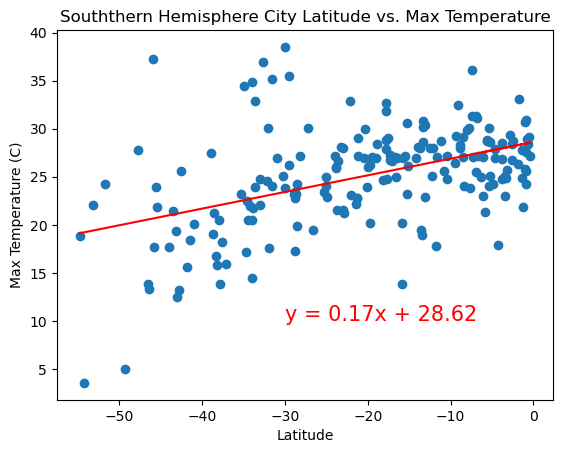

In [26]:
# Linear regression on Southern Hemisphere
#copied from regression above with source data and names changed
Sx_Lat=southern_hemi_df['Lat']
Sy_Temp=southern_hemi_df['Max Temp']
Sy_Hum=southern_hemi_df['Humidity']
Sy_Cloud=southern_hemi_df['Cloudiness']
Sy_Wind=southern_hemi_df['Wind Speed']

(ST_slope,ST_intercept,ST_rvalue,ST_pvalue,NT_stderr)=linregress(Sx_Lat,Sy_Temp)
(SH_slope,SH_intercept,SH_rvalue,SH_pvalue,SH_stderr)=linregress(Sx_Lat,Sy_Hum)
(SC_slope,SC_intercept,SC_rvalue,SC_pvalue,SC_stderr)=linregress(Sx_Lat,Sy_Cloud)
(SW_slope,SW_intercept,SW_rvalue,SW_pvalue,SW_stderr)=linregress(Sx_Lat,Sy_Wind)

STemp_regress=Sx_Lat*ST_slope+ST_intercept
SHum_regress=Sx_Lat*SH_slope+SH_intercept
SCloud_regress=Sx_Lat*SC_slope+SC_intercept
SWind_regress=Sx_Lat*SW_slope+SW_intercept

#plot latitude vs. max temp for southern hemisphere with regression line and equation
plt.scatter(Sx_Lat,Sy_Temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Souththern Hemisphere City Latitude vs. Max Temperature')

#regression line plot
plt.plot(Sx_Lat,STemp_regress,"r-")

#add equation
STemp_line_eq = "y = " + str(round(ST_slope,2)) + "x + " + str(round(ST_intercept,2))
plt.annotate(STemp_line_eq,(-30,10),fontsize=15,color='red')

print(f"The r-squared is: {ST_rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Both plots have a clear trend, the trend for the northern hemisphere matches the regression line much more closely, although it is not exact.  The southern hemisphere trend does not really correlate with the regression line, demonstrated by the low R squared value.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1600125380396355


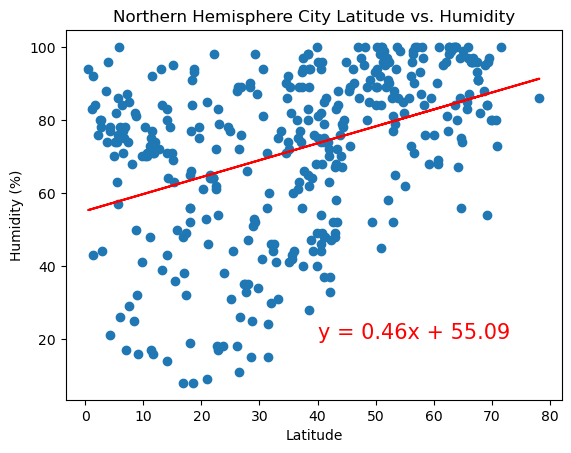

In [27]:
# Northern Hemisphere
#plot latitude vs. Humidity for northern hemisphere with regression line and equation
plt.scatter(Nx_Lat,Ny_Hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity')

#regression line plot
plt.plot(Nx_Lat,NHum_regress,"r-")

#add equation
NHum_line_eq = "y = " + str(round(NH_slope,2)) + "x + " + str(round(NH_intercept,2))
plt.annotate(NHum_line_eq,(40,20),fontsize=15,color='red')

print(f"The r-squared is: {NH_rvalue**2}")

plt.show()

The r-squared is: 0.09401817962930253


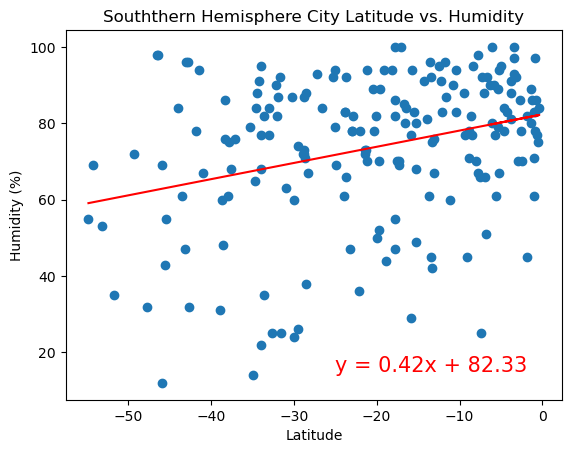

In [29]:
# Southern Hemisphere
#plot latitude vs. Humidity for southern hemisphere with regression line and equation
plt.scatter(Sx_Lat,Sy_Hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Souththern Hemisphere City Latitude vs. Humidity')

#regression line plot
plt.plot(Sx_Lat,SHum_regress,"r-")

#add equation
SHum_line_eq = "y = " + str(round(SH_slope,2)) + "x + " + str(round(SH_intercept,2))
plt.annotate(SHum_line_eq,(-25,15),fontsize=15,color='red')

print(f"The r-squared is: {SH_rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Neither hemisphere has a strong trend that matches a linear regression, although both plots seem to show higher humidity closer to a latitude of 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05191982933420153


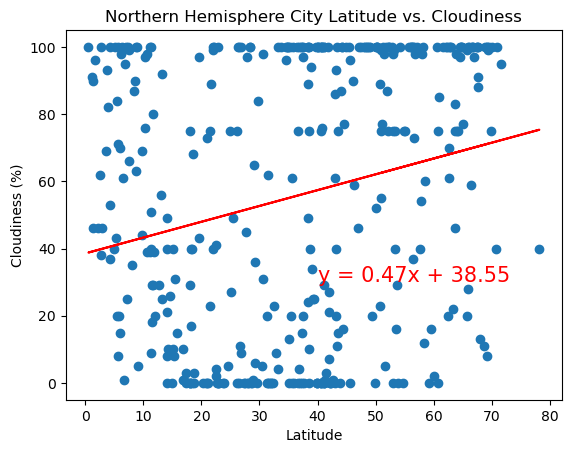

In [30]:
# Northern Hemisphere
#plot latitude vs. Cloudiness for northern hemisphere with regression line and equation
plt.scatter(Nx_Lat,Ny_Cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness')

#regression line plot
plt.plot(Nx_Lat,NCloud_regress,"r-")

#add equation
NCloud_line_eq = "y = " + str(round(NC_slope,2)) + "x + " + str(round(NC_intercept,2))
plt.annotate(NCloud_line_eq,(40,30),fontsize=15,color='red')

print(f"The r-squared is: {NC_rvalue**2}")

plt.show()

The r-squared is: 0.06948532046202009


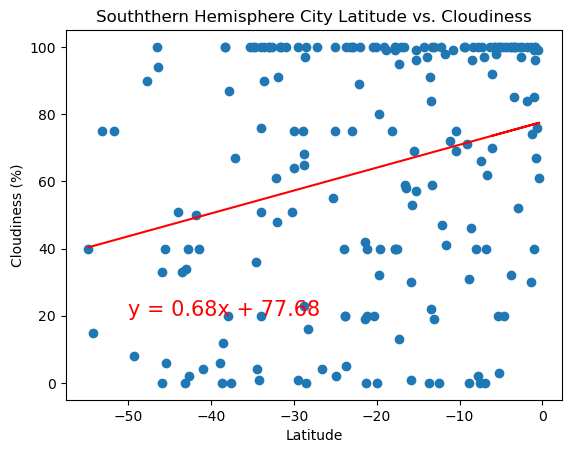

In [34]:
# Southern Hemisphere
#plot latitude vs. Cloudiness for southern hemisphere with regression line and equation
plt.scatter(Sx_Lat,Sy_Cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Souththern Hemisphere City Latitude vs. Cloudiness')

#regression line plot
plt.plot(Sx_Lat,SCloud_regress,"r-")

#add equation
SCloud_line_eq = "y = " + str(round(SC_slope,2)) + "x + " + str(round(SC_intercept,2))
plt.annotate(SCloud_line_eq,(-50,20),fontsize=15,color='red')

print(f"The r-squared is: {SC_rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Neither hemisphere plot shows the data correlating to a linear regression model.  The plots do show that the cloudiness seems to cluster around the two extremes (100 and 0).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0050117668007852445


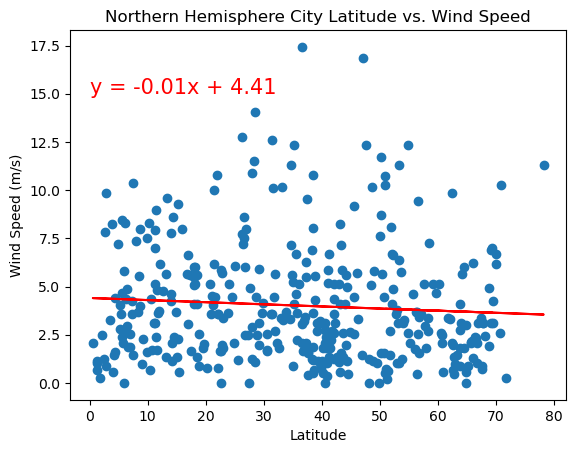

In [35]:
# Northern Hemisphere
#plot latitude vs. Wind Speed for northern hemisphere with regression line and equation
plt.scatter(Nx_Lat,Ny_Wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed')

#regression line plot
plt.plot(Nx_Lat,NWind_regress,"r-")

#add equation
NWind_line_eq = "y = " + str(round(NW_slope,2)) + "x + " + str(round(NW_intercept,2))
plt.annotate(NWind_line_eq,(0,15),fontsize=15,color='red')

print(f"The r-squared is: {NW_rvalue**2}")

plt.show()

The r-squared is: 0.028988823307548758


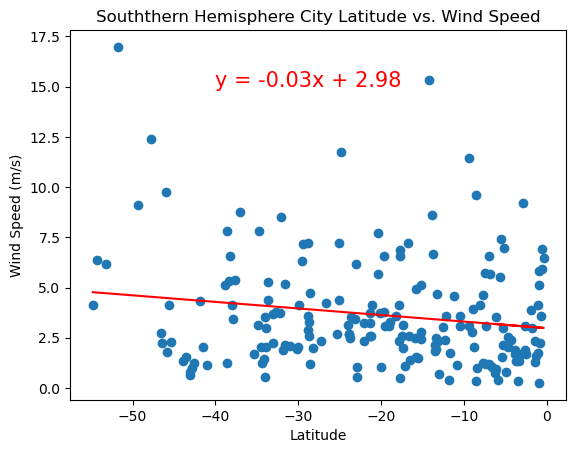

In [36]:
# Southern Hemisphere
#plot latitude vs. Wind Speed for southern hemisphere with regression line and equation
plt.scatter(Sx_Lat,Sy_Wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Souththern Hemisphere City Latitude vs. Wind Speed')

#regression line plot
plt.plot(Sx_Lat,SWind_regress,"r-")

#add equation
SWind_line_eq = "y = " + str(round(SW_slope,2)) + "x + " + str(round(SW_intercept,2))
plt.annotate(SWind_line_eq,(-40,15),fontsize=15,color='red')

print(f"The r-squared is: {SW_rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Neither plot shows a correlation to the linear regression model and both plots show that the wind speed tends to be in a lower range and high numbers are more like outliers than a usual data point.  